## Question 1 - Extracting Tesla Stock Data Using yfinance

In [1]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd

tesla_stock = yf.Ticker("TSLA")
tesla_data = tesla_stock.history(period="1d", start="2023-01-01", end="2024-01-01")

tesla_data.reset_index(inplace=True)

tesla_data.to_csv("tesla_stock_data.csv", index=False)

print(tesla_data.head())

                       Date        Open        High         Low       Close  \
0 2023-01-03 00:00:00-05:00  118.470001  118.800003  104.639999  108.099998   
1 2023-01-04 00:00:00-05:00  109.110001  114.589996  107.519997  113.639999   
2 2023-01-05 00:00:00-05:00  110.510002  111.750000  107.160004  110.339996   
3 2023-01-06 00:00:00-05:00  103.000000  114.389999  101.809998  113.059998   
4 2023-01-09 00:00:00-05:00  118.959999  123.519997  117.110001  119.769997   

      Volume  Dividends  Stock Splits  
0  231402800        0.0           0.0  
1  180389000        0.0           0.0  
2  157986300        0.0           0.0  
3  220911100        0.0           0.0  
4  190284000        0.0           0.0  


## Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

response = requests.get(url)

if response.status_code == 200:
    html_data = response.text

    # Create a BeautifulSoup object
    soup = BeautifulSoup(html_data, 'html.parser')

    # Find all tables in the HTML
    tables = soup.find_all('table')

    # Check if any tables were found
    if tables:
        # Use the first table found
        tesla_revenue = pd.read_html(str(tables[0]))[0]

        # Assuming the DataFrame has columns Date and Revenue
        # If not, you may need to specify the column names based on the structure of the table.
        tesla_revenue.columns = ['Date', 'Revenue']

        # Remove the dollar sign from the Revenue column
        tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace('$', '')

        # Execute the following lines to remove null or empty strings in the Revenue column.
        tesla_revenue.dropna(inplace=True)
        tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

        print(tesla_revenue.tail())



    Date Revenue
8   2013   2,013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


/var/folders/22/r1hcndlj3zb4fcdcsyj_5p580000gn/T/ipykernel_2145/2949951043.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(tables[0]))[0]


## Question 3 - Extracting GameStop Stock Data Using yfinanc

In [3]:
gme_ticker = yf.Ticker("GME")

# Extract stock information
gme_data = gme_ticker.history(period="max")

# Reset index
gme_data.reset_index(inplace=True)

# Display the first five rows
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Save the HTML content
    html_data = response.text
    
    # Parse the HTML data using BeautifulSoup
    soup = BeautifulSoup(html_data, 'html.parser')
    
    # Find the table containing GameStop revenue
    tables = soup.find_all('table')
    gme_revenue = pd.read_html(str(tables))[0]

    # Rename the columns
    gme_revenue.columns = ['Date', 'Revenue']

    # Clean the data in the Revenue column
    gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',|\$', "", regex=True)

    # Display the last five rows of the gme_revenue dataframe
    print(gme_revenue.tail())
else:
    print(f"Error downloading webpage. Status code: {response.status_code}")


    Date Revenue
11  2009    8806
12  2008    7094
13  2007    5319
14  2006    3092
15  2005    1843


/var/folders/22/r1hcndlj3zb4fcdcsyj_5p580000gn/T/ipykernel_2145/1904664392.py:19: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(tables))[0]


## Question 5 - Tesla Stock and Revenue Dashboard

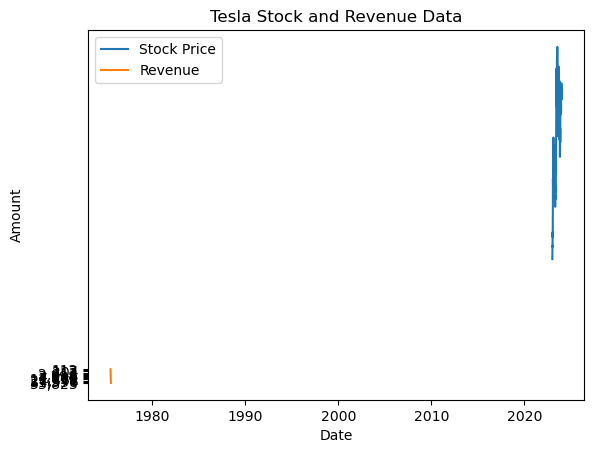

In [7]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    # Plotting the stock data
    plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Price')

    # Plotting the revenue data
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label='Revenue')

    plt.xlabel('Date')
    plt.ylabel('Amount')
    plt.title(title)
    plt.legend()

# Assuming you have tesla_data and tesla_revenue available
make_graph(tesla_data, tesla_revenue, 'Tesla Stock and Revenue Data')

plt.show()


## Question 6 - GameStop Stock and Revenue Dashboard-

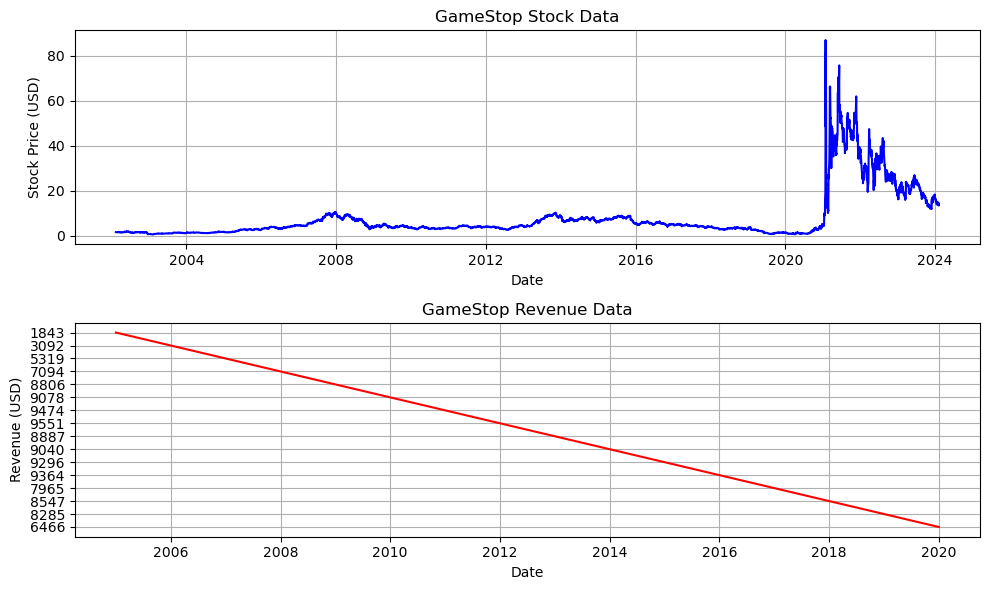

In [8]:
import matplotlib.pyplot as plt

# Define the make_graph function
def make_graph(stock_data, revenue_data, company_name):
    plt.figure(figsize=(10, 6))

    # Plotting stock data
    plt.subplot(2, 1, 1)
    plt.plot(stock_data['Date'], stock_data['Close'], color='b')
    plt.title(f'{company_name} Stock Data')
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.grid(True)

    # Plotting revenue data
    plt.subplot(2, 1, 2)
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], color='r')
    plt.title(f'{company_name} Revenue Data')
    plt.xlabel('Date')
    plt.ylabel('Revenue (USD)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Call the make_graph function
make_graph(gme_data, gme_revenue, 'GameStop')
